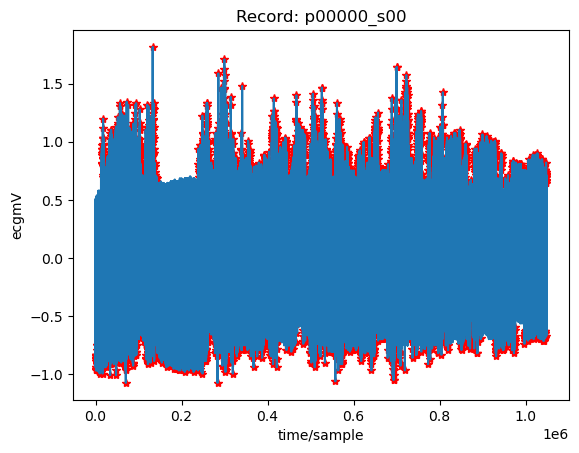

In [1]:
import wfdb
patient_id=0
segment_id=0
data_path = './data/p00/p00000/p00000_s00'
filename = f'{data_path}'
rec = wfdb.rdrecord(filename)
ann = wfdb.rdann(filename, "atr")
wfdb.plot_wfdb(rec, ann)

In [2]:
import wfdb

data_path = './data/p00/p00000/p00000_s00'
rec = wfdb.rdrecord(data_path)
ann = wfdb.rdann(filename, "atr")
# wfdb.plot_wfdb(rec, ann, plot_sym=True, figsize=(15,4))

from collections import Counter
counts = Counter(ann.symbol)

# Print unique values and their counts
for value, count in counts.items():
    print(f"{value}: {count}")


N: 6641
+: 38
Q: 244


# First 3 annotations

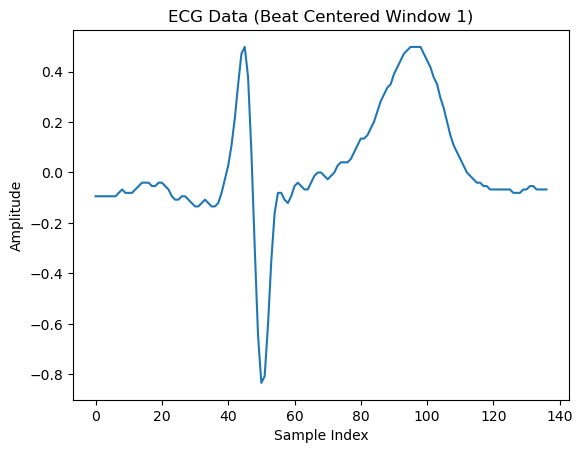

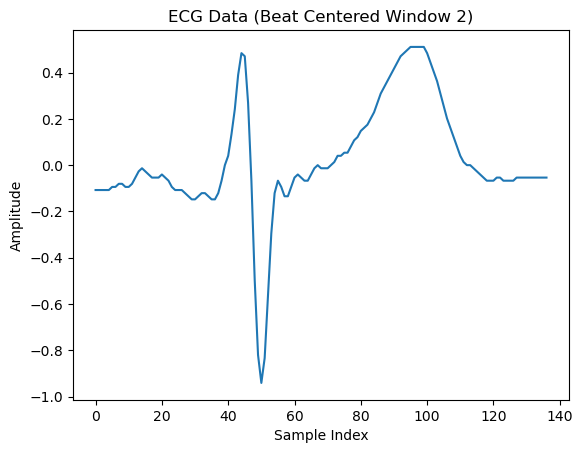

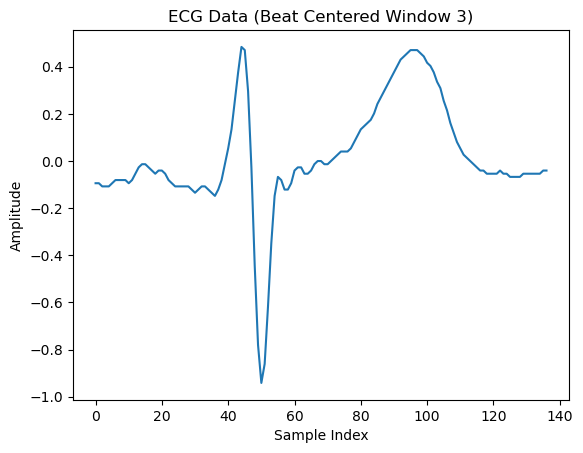

In [28]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

# Load the record and annotation
data_path = './data/p00/p00000/p00000_s00'
rec = wfdb.rdrecord(data_path)
ann = wfdb.rdann(data_path, "atr")

# Extract sampling frequency (Fs) from the header file
Fs = rec.fs

# Calculate window size as 0.4 seconds
window_start =  int(0.4 * Fs)
window_end =  int(0.7 * Fs)
# Define a function to plot ECG data using a sliding window with centered beats
def plot_ecg_with_window(ecg_signal, ann, num_beats_to_plot=1):
    annotation = ann.sample
    for i, (peak, beat_type) in enumerate(zip(annotation[2:-1], annotation[2:-1])):
        if (i ==num_beats_to_plot):
            break
        start_idx = peak - window_start // 2
        end_idx = peak + window_end // 2
        
        window_data = ecg_signal[start_idx:end_idx]
        
        plt.figure()
        plt.plot(window_data)
        plt.title(f"ECG Data (Beat Centered Window {i+1})")
        plt.xlabel("Sample Index")
        plt.ylabel("Amplitude")
        plt.show()

ecg_data = rec.p_signal[:, 0]
plot_ecg_with_window(ecg_data, ann, num_beats_to_plot=3)

# Criando segmentos

In [1]:
import os
import numpy as np
import wfdb

record_path = '.\\data\\p00'
# Load the ECG record
for i in range(0, 1000):
    print(f'Patient {i}')
    for j in range(0,50):
        pacient_num = f'p{i:05d}'
        annotation_path = f"{record_path}\\{pacient_num}\\{pacient_num}_s{j:02d}"

        try:
            # Load annotations
            annotation = wfdb.rdann(annotation_path, extension='atr')
            ann_sample = annotation.sample
            ann_symbol = annotation.symbol

            # Load ECG signal
            try:
                record = wfdb.rdrecord(annotation_path)
                fs = record.fs  # Sampling frequency
                ecg_signal = record.p_signal[:, 0]

                # Calculate window size based on window duration and sampling frequency
                window_start =  int(0.4 * fs)
                window_end =  int(0.7 * fs)

                # Iterate over each heartbeat and segment it
                for k, (peak, beat_type) in enumerate(zip(ann_sample[2:-2], ann_symbol[2:-2])):
                    if beat_type in ["|","\""]: # Ignore | and " beat_type
                        continue
                    
                    # Centralize the segment around the peak
                    start = peak - window_start // 2
                    end = peak + window_end // 2
                    
                    # Ensure the segment boundaries are within the signal range
                    start = max(0, start)
                    end = min(len(ecg_signal), end)
                    
                    segment = ecg_signal[start:end]

                    # Check if the segment directory exists
                    segment_dir = os.path.join(record_path, 'segmented_data', beat_type, pacient_num)
                    if not os.path.exists(segment_dir):
                        os.makedirs(segment_dir)

                    # Check if the segment file already exists
                    file_name = f"{pacient_num}_s{j:02d}_beat_{k:05d}_{beat_type}.csv"
                    file_path = os.path.join(segment_dir, file_name)
                    if not os.path.exists(file_path):
                        # Save the segment as a new file in the segmented folder
                        np.savetxt(file_path, segment, delimiter=",")
                        # print(f"Segment {k} ({beat_type}) as {file_name}")
                    # else:
                    #     print(f"SKIPPING - Segment {k} ({beat_type}) as it already exists.")
            except:
                print(f'{annotation_path} cannot load')
        except FileNotFoundError:
            print(f"FileNotFoundError: {annotation_path} not found. Skipping...")


Patient 0
Patient 1
Patient 2
.\data\p00\p00002\p00002_s36 cannot load


# First, Middle and Last Beats

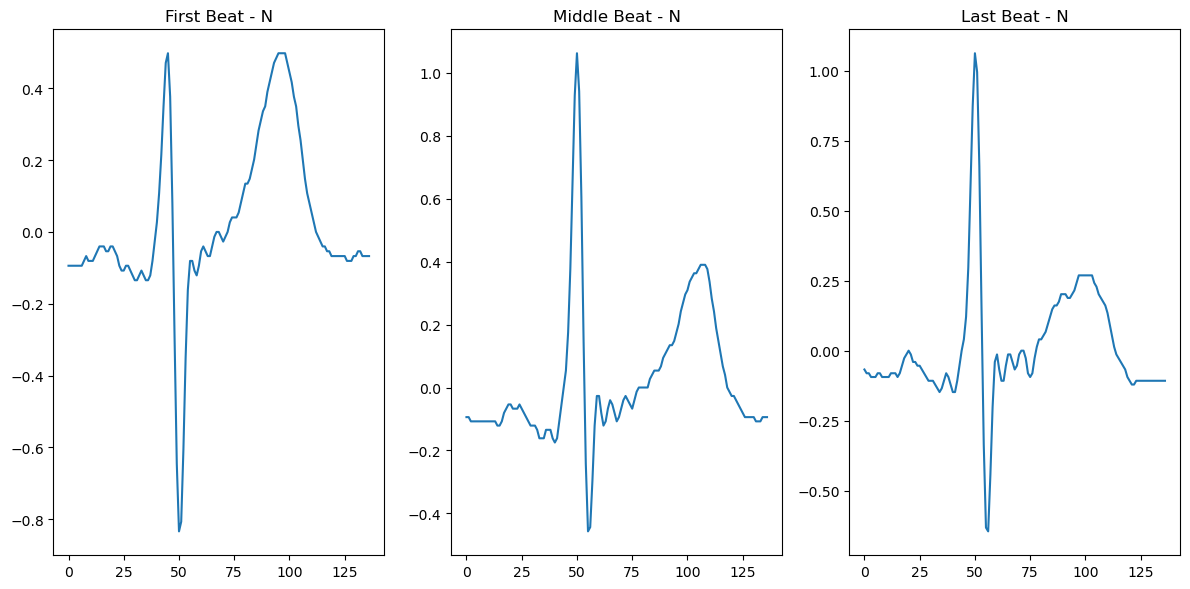

In [1]:
import os
import matplotlib.pyplot as plt
import wfdb
import numpy as np

record_num = 'p00000'
beat_type = 'N'
segment_dir = f'./data/p00/segmented_data/{beat_type}/{record_num}'

# List all files in the segment directory for the given beat type
files = sorted(os.listdir(segment_dir))

first_file_path = os.path.join(segment_dir, files[0])
middle_file_path = os.path.join(segment_dir, files[len(files)//2])
last_file_path = os.path.join(segment_dir, files[-1])

# Load ECG signals using wfdb
first_beat_signal = np.loadtxt(first_file_path, delimiter=",")
middle_beat_signal = np.loadtxt(middle_file_path, delimiter=",")
last_beat_signal = np.loadtxt(last_file_path, delimiter=",")

# Plot ECG signals
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(first_beat_signal)
plt.title(f'First Beat - {beat_type}')

plt.subplot(1, 3, 2)
plt.plot(middle_beat_signal)
plt.title(f'Middle Beat - {beat_type}')

plt.subplot(1, 3, 3)
plt.plot(last_beat_signal)
plt.title(f'Last Beat - {beat_type}')

plt.tight_layout()
plt.show()

# Counter

In [ ]:
import os
import numpy as np
import wfdb

record_path = '.\\data\\p00\\'
beat_type_counters = {}  # Dictionary to store counters for each beat type

# Load the ECG record
for i in range(0, 1000):
    for j in range(0,50):
        pacient_num = f'p{i:05d}'
        annotation_path = f"{record_path}\\{pacient_num}\\{pacient_num}_s{j:02d}"

        try:
            # Load annotations
            annotation = wfdb.rdann(annotation_path, extension='atr')
            ann_symbol = annotation.symbol

            # Iterate over each heartbeat and count the occurrences of each beat type
            for beat_type in ann_symbol[2:-2]:
                if beat_type in ["|", "\""]:  # Ignore | and " beat_type
                    continue

                # Increment counter for beat_type
                beat_type_counters[beat_type] = beat_type_counters.get(beat_type, 0) + 1
        except:
            print(f"File Error: {annotation_path}. Skipping...")

# Print beat type counters
print("\nBeat Type Counters:")
for beat_type, count in beat_type_counters.items():
    print(f"{beat_type}: {count}")

File Error: .\data\p00\\p00008\p00008_s49. Skipping...
File Error: .\data\p00\\p00030\p00030_s41. Skipping...
File Error: .\data\p00\\p00030\p00030_s42. Skipping...
File Error: .\data\p00\\p00030\p00030_s43. Skipping...
File Error: .\data\p00\\p00030\p00030_s44. Skipping...
File Error: .\data\p00\\p00030\p00030_s45. Skipping...
File Error: .\data\p00\\p00030\p00030_s46. Skipping...
File Error: .\data\p00\\p00030\p00030_s47. Skipping...
File Error: .\data\p00\\p00030\p00030_s48. Skipping...
File Error: .\data\p00\\p00030\p00030_s49. Skipping...
File Error: .\data\p00\\p00056\p00056_s21. Skipping...
File Error: .\data\p00\\p00056\p00056_s22. Skipping...
File Error: .\data\p00\\p00056\p00056_s23. Skipping...
File Error: .\data\p00\\p00056\p00056_s24. Skipping...
File Error: .\data\p00\\p00056\p00056_s25. Skipping...
File Error: .\data\p00\\p00056\p00056_s26. Skipping...
File Error: .\data\p00\\p00056\p00056_s27. Skipping...
File Error: .\data\p00\\p00056\p00056_s28. Skipping...
File Error

# Beat Type Counters TOTAL:
> N: 18272296  
> +: 282833  
> Q: 6801464  
> S: 52404  
> V: 145645  


# Pacients and their beats

In [52]:
import os
import numpy as np
import wfdb
import csv
import pandas as pd

record_path = '.\\data\\p00'

# Initialize lists to store patient information
patients = []
V_beats = []
S_beats = []

# Load the ECG record
for i in range(0, 1000):
    print(f'Patient {i}')
    V_beat_present = 0
    S_beat_present = 0
    for j in range(0, 50):
        pacient_num = f'p{i:05d}'
        annotation_path = f"{record_path}\\{pacient_num}\\{pacient_num}_s{j:02d}"

        try:
            # Load annotations
            annotation = wfdb.rdann(annotation_path, extension='atr')
            ann_symbol = annotation.symbol

            # Check if V beats or S beats are present for this patient
            if 'V' in ann_symbol:
                V_beat_present = 1
            if 'S' in ann_symbol:
                S_beat_present = 1
            if V_beat_present and S_beat_present:
                # If both V and S beats are present, no need to check further for this patient
                break

        except:
            print(f"File Error: {annotation_path}. Skipping...")

    # Append patient information to lists
    patients.append(pacient_num)
    V_beats.append(V_beat_present)
    S_beats.append(S_beat_present)

# Create DataFrame
data = {
    'Patient': patients,
    'V_beats': V_beats,
    'S_beats': S_beats
}

df = pd.DataFrame(data)
df.to_csv('binary_beats.csv')

Patient 0
Patient 1
Patient 2
Patient 3
Patient 4
Patient 5
Patient 6
Patient 7
Patient 8
Fil Error: .\data\p00\p00008\p00008_s49. Skipping...
Patient 9
Patient 10
Patient 11
Patient 12
Patient 13
Patient 14
Patient 15
Patient 16
Patient 17
Patient 18
Patient 19
Patient 20
Patient 21
Patient 22
Patient 23
Patient 24
Patient 25
Patient 26
Patient 27
Patient 28
Patient 29
Patient 30
Patient 31
Patient 32
Patient 33
Patient 34
Patient 35
Patient 36
Patient 37
Patient 38
Patient 39
Patient 40
Patient 41
Patient 42
Patient 43
Patient 44
Patient 45
Patient 46
Patient 47
Patient 48
Patient 49
Patient 50
Patient 51
Patient 52
Patient 53
Patient 54
Patient 55
Patient 56
Patient 57
Patient 58
Patient 59
Patient 60
Patient 61
Patient 62
Patient 63
Patient 64
Patient 65
Patient 66
Patient 67
Patient 68
Patient 69
Patient 70
Patient 71
Patient 72
Patient 73
Patient 74
Patient 75
Patient 76
Patient 77
Patient 78
Patient 79
Patient 80
Patient 81
Patient 82
Fil Error: .\data\p00\p00082\p00082_s20. Ski

In [53]:
import os
import pandas as pd

record_path = '.\\data\\p00\\segmented_data'

# Initialize dictionary to store patient information
patient_info = {}

# Scan the folder structure
for beat_type in ['N', 'S', 'V']:
    beat_type_path = os.path.join(record_path, beat_type)
    for patient_folder in os.listdir(beat_type_path):
        if patient_folder not in patient_info:
            patient_info[patient_folder] = {'V_beats': 0, 'S_beats': 0, 'N_beats': 0}
        if beat_type == 'V':
            patient_info[patient_folder]['V_beats'] = 1
        elif beat_type == 'S':
            patient_info[patient_folder]['S_beats'] = 1
        elif beat_type == 'N':
            patient_info[patient_folder]['N_beats'] = 1

# Create DataFrame
df = pd.DataFrame.from_dict(patient_info, orient='index')
df.index.name = 'Patient'
df.reset_index(inplace=True)

df.fillna(0, inplace=True)  # Fill NaN values with 0 for patients without certain beats
df = df.astype({'V_beats': int, 'S_beats': int, 'N_beats': int})  # Convert columns to integers
df

,Patient,V_beats,S_beats,N_beats
0,p00000,0,1,1
1,p00001,1,1,1
2,p00002,1,1,1
3,p00003,1,1,1
4,p00004,1,1,1
...,...,...,...,...
252,p00895,1,0,1
253,p00985,1,1,1
254,p00987,1,1,1
255,p00988,1,1,1


In [54]:
df.groupby('Patient').sum().sum()


V_beats    210
S_beats    231
N_beats    257
dtype: int64

In [56]:
import pandas as pd

# Original DataFrame
# Assuming df is already defined as per your code

# Filter patients with 'V' beats
V_patients = df[df['V_beats'] == 1].sample(70)

# Filter patients with 'N' beats, excluding those already selected for 'V' beats
N_patients = df[(df['N_beats'] == 1) & (~df['Patient'].isin(V_patients['Patient']))].sample(70)

# Filter patients with 'S' beats, excluding those already selected for 'V' or 'N' beats
S_patients = df[(df['S_beats'] == 1) & (~df['Patient'].isin(V_patients['Patient'])) & (~df['Patient'].isin(N_patients['Patient']))].sample(70)

# Concatenate all selected patients
selected_patients = pd.concat([V_patients, N_patients, S_patients])

# Create the new DataFrame with 'Patient' and 'Class' columns
new_df = pd.DataFrame({
    'Patient': selected_patients['Patient'],
    'Class': ''
})

# Assign class labels
new_df.loc[new_df['Patient'].isin(V_patients['Patient']), 'Class'] = 'V'
new_df.loc[new_df['Patient'].isin(N_patients['Patient']), 'Class'] = 'N'
new_df.loc[new_df['Patient'].isin(S_patients['Patient']), 'Class'] = 'S'

# Output the new DataFrame
new_df.to_csv('patient_balanced.csv')


In [57]:
new_df

,Patient,Class
4,p00004,V
13,p00025,V
238,p00827,V
165,p00329,V
60,p00105,V
...,...,...
251,p00840,S
210,p00711,S
20,p00043,S
39,p00068,S


# Path Adjustment

In [58]:
data = pd.read_csv('patient_balanced.csv', index_col=0)
data

,Patient,Class
4,p00004,V
13,p00025,V
238,p00827,V
165,p00329,V
60,p00105,V
...,...,...
251,p00840,S
210,p00711,S
20,p00043,S
39,p00068,S


In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('patient_balanced.csv', index_col=0)
def construct_path(row):
    pacient_id = row['Patient']
    beats_class = row['Class']
    if beats_class == 'V':
        return f".\\data\\p00\\segmented_data\\V\\{pacient_id}"
    elif beats_class == 'N':
        return f".\\data\\p00\\segmented_data\\N\\{pacient_id}"
    else:
        return f".\\data\\p00\\segmented_data\\S\\{pacient_id}"

# Apply the function to each row of the dataframe
data['path'] = data.apply(construct_path, axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, data['Class'], test_size=0.2, stratify=data['Class'], random_state=42)
print('train:', len(y_train))
print('test:', len(y_test))
print(X_test.head(2))
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
X_test

train: 168
test: 42
    Patient Class                                path
61   p00106     N  .\data\p00\segmented_data\N\p00106
131  p00239     V  .\data\p00\segmented_data\V\p00239


,Patient,Class,path
61,p00106,N,.\data\p00\segmented_data\N\p00106
131,p00239,V,.\data\p00\segmented_data\V\p00239
20,p00043,S,.\data\p00\segmented_data\S\p00043
180,p00347,V,.\data\p00\segmented_data\V\p00347
146,p00295,S,.\data\p00\segmented_data\S\p00295
13,p00025,V,.\data\p00\segmented_data\V\p00025
122,p00213,S,.\data\p00\segmented_data\S\p00213
213,p00716,N,.\data\p00\segmented_data\N\p00716
142,p00259,S,.\data\p00\segmented_data\S\p00259
208,p00709,S,.\data\p00\segmented_data\S\p00709


In [3]:
import os
import random
import numpy as np
import pandas as pd

# Define paths
ts_train_path = '.\\ts_files\\train.ts'
ts_test_path = '.\\ts_files\\test.ts'

# Create directories if they don't exist
os.makedirs(os.path.dirname(ts_train_path), exist_ok=True)
os.makedirs(os.path.dirname(ts_test_path), exist_ok=True)

# Function to read content from CSV file
def read_csv_content(file_path):
    try:
        data = np.genfromtxt(file_path, delimiter=",")
        if data.size == 0:  # Check if the data is empty
            return None
        return data
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None

# Function to create .TS file
def create_ts_file(ts_file_path, df, max_labels):
    segments_N, segments_V, segments_S = [], [], []

    for index, row in df.iterrows():
        patient = row['Patient']
        beat = row['Class']
        path = row['path']

        # Iterate over all records
        for root, dirs, files in os.walk(path):
            for file in files:
                if file.endswith(".csv"):
                    file_path = os.path.join(root, file)
                    # Extract label from the filename
                    label = file.split('_')[-1][0]

                    if os.path.exists(file_path):
                        segment_content = read_csv_content(file_path)
                        if segment_content is not None and label:
                            if (label == 'V' and beat == 'V') or (label == 'N' and beat == 'N') or (label == 'S' and beat == 'S'):
                                if label == 'S' and len(segments_S) < max_labels:
                                    segments_S.append((segment_content, label))
                                elif label == 'V' and len(segments_V) < max_labels:
                                    segments_V.append((segment_content, label))
                                elif label == 'N' and len(segments_N) < max_labels:
                                    segments_N.append((segment_content, label))

    # Shuffle and balance segments
    random.shuffle(segments_S)
    random.shuffle(segments_V)
    random.shuffle(segments_N)

    min_count = min(len(segments_S), len(segments_V), len(segments_N))
    segments_S = segments_S[:min_count]
    segments_V = segments_V[:min_count]
    segments_N = segments_N[:min_count]

    with open(ts_file_path, 'w') as ts_file:
        for segment_content, label in segments_S + segments_V + segments_N:
            ts_file.write(','.join(map(str, segment_content)) + f":{label}\n")

    print("TS file created successfully.")
    print(f"Number of 'N' labels: {len(segments_N)}")
    print(f"Number of 'V' labels: {len(segments_V)}")
    print(f"Number of 'S' labels: {len(segments_S)}\n")

# Create .TS files
create_ts_file(ts_test_path, X_test, 20000)
create_ts_file(ts_train_path, X_train, 100000)